# Rwanda Trade Data - Advanced Visualization & Correlation Analysis

## NISRA Statistical Datasets - Visual Analytics (2024Q4 & 2025Q1)

This notebook focuses on advanced data visualization and correlation analysis:
- Interactive visualizations using Plotly
- Geographic analysis and mapping
- Network analysis of trade relationships
- Advanced correlation heatmaps and scatter plots
- Time series decomposition and trend analysis
- Interactive dashboards and reporting

### Dataset Sources:
- 2024Q4_Trade_report_annexTables.xlsx
- 2025Q1_Trade_report_annexTables.xlsx
- Enhanced processed data from statistical analysis

In [1]:
# Import visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# For interactive maps (if geopandas is available)
try:
    import geopandas as gpd
    GEOPANDAS_AVAILABLE = True
except ImportError:
    GEOPANDAS_AVAILABLE = False
    print("⚠️ GeoPandas not available - geographic visualizations will be limited")

print("🎨 Starting Advanced Visualization Analysis...")

🎨 Starting Advanced Visualization Analysis...


## 1. Data Loading and Geographic Mapping

In [2]:
# Load comprehensive analysis data
import json

# Load the comprehensive analysis JSON file
with open('data/processed/comprehensive_analysis.json', 'r') as f:
    comprehensive_data = json.load(f)

print(f"📊 Loaded comprehensive analysis data")
print(f"📈 Quarters covered: {len(comprehensive_data['quarterly_aggregation']['exports'])}")
print(f"🌍 Countries found: {len(comprehensive_data['country_aggregation']['export_destinations'])}")

# Convert to DataFrames
exports_df = pd.DataFrame(comprehensive_data['quarterly_aggregation']['exports'])
imports_df = pd.DataFrame(comprehensive_data['quarterly_aggregation']['imports'])
countries_df = pd.DataFrame(comprehensive_data['country_aggregation']['export_destinations'])
import_countries_df = pd.DataFrame(comprehensive_data['country_aggregation']['import_sources'])

# Add country coordinates for mapping
country_coordinates = {
    'United Arab Emirates': {'lat': 23.4241, 'lon': 53.8478, 'region': 'Asia'},
    'Democratic Republic of the Congo': {'lat': -4.0383, 'lon': 21.7587, 'region': 'Africa'},
    'China': {'lat': 35.8617, 'lon': 104.1954, 'region': 'Asia'},
    'United Kingdom': {'lat': 55.3781, 'lon': -3.4360, 'region': 'Europe'},
    'Hong Kong': {'lat': 22.3193, 'lon': 114.1694, 'region': 'Asia'},
    'Luxembourg': {'lat': 49.8153, 'lon': 6.1296, 'region': 'Europe'},
    'Pakistan': {'lat': 30.3753, 'lon': 69.3451, 'region': 'Asia'},
    'India': {'lat': 20.5937, 'lon': 78.9629, 'region': 'Asia'},
    'Uganda': {'lat': 1.3733, 'lon': 32.2903, 'region': 'Africa'},
    'United States': {'lat': 37.0902, 'lon': -95.7129, 'region': 'Americas'},
    'Netherlands': {'lat': 52.1326, 'lon': 5.2913, 'region': 'Europe'},
    'Singapore': {'lat': 1.3521, 'lon': 103.8198, 'region': 'Asia'},
    'South Sudan': {'lat': 6.8770, 'lon': 31.3070, 'region': 'Africa'},
    'Belgium': {'lat': 50.5039, 'lon': 4.4699, 'region': 'Europe'},
    'Congo': {'lat': -0.2280, 'lon': 15.8277, 'region': 'Africa'},
    'Ethiopia': {'lat': 9.1450, 'lon': 40.4897, 'region': 'Africa'},
    'Germany': {'lat': 51.1657, 'lon': 10.4515, 'region': 'Europe'},
    'Thailand': {'lat': 15.8700, 'lon': 100.9925, 'region': 'Asia'},
    'Tanzania': {'lat': -6.3728, 'lon': 34.8924, 'region': 'Africa'},
    'Kenya': {'lat': -0.0236, 'lon': 37.9062, 'region': 'Africa'}
}

# Add coordinates to dataframes
def add_coordinates(df, country_col, coord_dict):
    df = df.copy()
    df['latitude'] = df[country_col].map(lambda x: coord_dict.get(x, {}).get('lat', 0))
    df['longitude'] = df[country_col].map(lambda x: coord_dict.get(x, {}).get('lon', 0))
    df['region'] = df[country_col].map(lambda x: coord_dict.get(x, {}).get('region', 'Unknown'))
    return df

countries_df = add_coordinates(countries_df, 'destination_country', country_coordinates)
import_countries_df = add_coordinates(import_countries_df, 'source_country', country_coordinates)

print(f"\n📍 Added coordinates for {len([c for c in countries_df['latitude'] if c != 0])} export destinations")
print(f"📍 Added coordinates for {len([c for c in import_countries_df['latitude'] if c != 0])} import sources")

📊 Loaded comprehensive analysis data
📈 Quarters covered: 13
🌍 Countries found: 20

📍 Added coordinates for 18 export destinations
📍 Added coordinates for 9 import sources


## 2. Interactive Geographic Visualizations

In [3]:
# Create interactive world map visualization
print("🗺️ CREATING INTERACTIVE GEOGRAPHIC VISUALIZATIONS")
print("="*70)

# Filter out countries without coordinates
export_map_data = countries_df[countries_df['latitude'] != 0].copy()
import_map_data = import_countries_df[import_countries_df['latitude'] != 0].copy()

print(f"\n📊 Export destinations with coordinates: {len(export_map_data)}")
print(f"📊 Import sources with coordinates: {len(import_map_data)}")

# Create interactive scatter plot on world map
fig = go.Figure()

# Add export destinations
fig.add_trace(go.Scattergeo(
    locationmode='ISO-3',
    lat=export_map_data['latitude'],
    lon=export_map_data['longitude'],
    text=export_map_data['destination_country'],
    mode='markers+text',
    name='Export Destinations',
    marker=dict(
        size=np.log10(export_map_data['export_value']) * 3,
        color='blue',
        opacity=0.7,
        line=dict(width=1, color='darkblue'),
        sizemode='diameter'
    ),
    texttemplate='%{text}<br>%{marker.size:.0f}M',
    textposition='top center',
    hovertemplate=
        '<b>%{text}</b><br>' +
        'Export Value: $%{marker.size:.0f}M<br>' +
        '<extra></extra>'
))

# Add import sources
fig.add_trace(go.Scattergeo(
    locationmode='ISO-3',
    lat=import_map_data['latitude'],
    lon=import_map_data['longitude'],
    text=import_map_data['source_country'],
    mode='markers+text',
    name='Import Sources',
    marker=dict(
        size=np.log10(import_map_data['import_value']) * 3,
        color='red',
        opacity=0.7,
        line=dict(width=1, color='darkred'),
        sizemode='diameter'
    ),
    texttemplate='%{text}<br>%{marker.size:.0f}M',
    textposition='top center',
    hovertemplate=
        '<b>%{text}</b><br>' +
        'Import Value: $%{marker.size:.0f}M<br>' +
        '<extra></extra>'
))

fig.update_layout(
    title=dict(
        text='Rwanda Trade Network - Export Destinations & Import Sources',
        x=0.5,
        font=dict(size=20)
    ),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth',
        showcountries=True,
        countrycolor='lightgray'
    ),
    legend=dict(
        x=0.02,
        y=0.95,
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='black',
        borderwidth=1
    ),
    width=1200,
    height=800
)

fig.show()

# Save interactive map as HTML
fig.write_html('visualizations/rwanda_trade_map.html')
print("\n💾 Interactive trade map saved as 'visualizations/rwanda_trade_map.html'")

🗺️ CREATING INTERACTIVE GEOGRAPHIC VISUALIZATIONS

📊 Export destinations with coordinates: 18
📊 Import sources with coordinates: 9



💾 Interactive trade map saved as 'visualizations/rwanda_trade_map.html'


## 3. Advanced Correlation Analysis and Heatmaps

🔗 ADVANCED CORRELATION ANALYSIS

📊 Correlation dataset shape: (12, 7)

📋 Available columns for correlation:
  - quarter
  - export_value
  - import_value
  - trade_balance
  - export_to_import_ratio
  - export_growth_rate
  - import_growth_rate


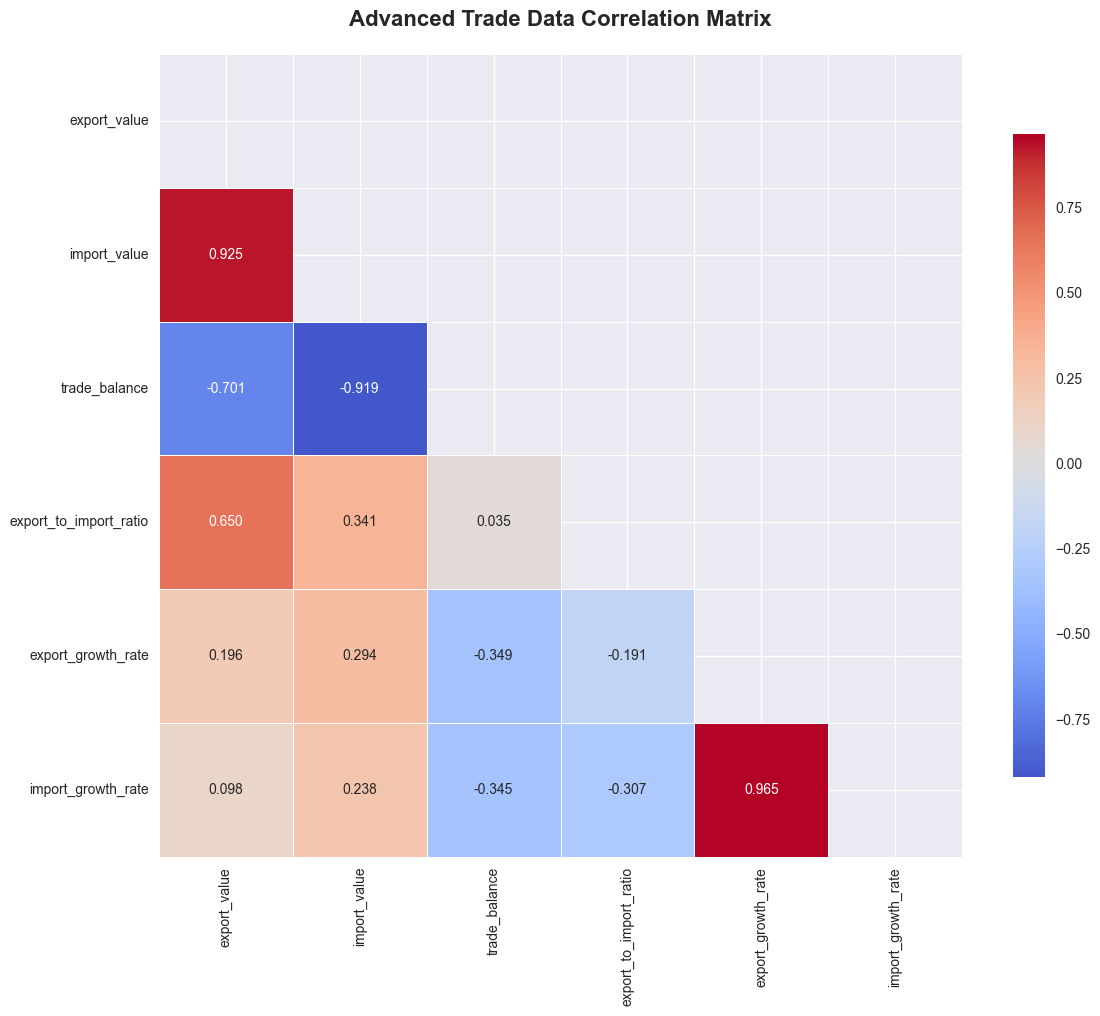


🧪 CORRELATION SIGNIFICANCE TESTING

📊 Found 5 significant correlations (p < 0.05):

--------------------------------------------------------------------------------
export_value ↔ import_value
  Correlation: 0.9253 ***
  P-value: 0.0000

export_value ↔ trade_balance
  Correlation: -0.7006 *
  P-value: 0.0112

export_value ↔ export_to_import_ratio
  Correlation: 0.6498 *
  P-value: 0.0222

import_value ↔ trade_balance
  Correlation: -0.9189 ***
  P-value: 0.0000

export_growth_rate ↔ import_growth_rate
  Correlation: 0.9654 ***
  P-value: 0.0000



In [4]:
# Advanced correlation analysis
print("🔗 ADVANCED CORRELATION ANALYSIS")
print("="*70)

# Create comprehensive correlation dataset
trade_df = pd.merge(exports_df, imports_df, on='quarter', suffixes=('_export', '_import'))
trade_df['trade_balance'] = trade_df['export_value'] - trade_df['import_value']
trade_df['export_to_import_ratio'] = trade_df['export_value'] / trade_df['import_value']
trade_df['export_growth_rate'] = trade_df['export_value'].pct_change()
trade_df['import_growth_rate'] = trade_df['import_value'].pct_change()

# Drop NaN values
trade_df = trade_df.dropna()

print(f"\n📊 Correlation dataset shape: {trade_df.shape}")
print(f"\n📋 Available columns for correlation:")
for col in trade_df.columns:
    print(f"  - {col}")

# Select numeric columns for correlation
numeric_cols = ['export_value', 'import_value', 'trade_balance', 'export_to_import_ratio', 
                'export_growth_rate', 'import_growth_rate']

# Calculate correlation matrix
correlation_matrix = trade_df[numeric_cols].corr()

# Create advanced correlation heatmap
plt.figure(figsize=(12, 10))

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            fmt='.3f',
            annot_kws={'size': 10})

plt.title('Advanced Trade Data Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Statistical significance of correlations
from scipy.stats import pearsonr
import itertools

print("\n🧪 CORRELATION SIGNIFICANCE TESTING")
print("="*70)

significant_correlations = []

for col1, col2 in itertools.combinations(numeric_cols, 2):
    corr_coef, p_value = pearsonr(trade_df[col1], trade_df[col2])
    if p_value < 0.05:  # Significant correlation
        significant_correlations.append({
            'variable_1': col1,
            'variable_2': col2,
            'correlation': corr_coef,
            'p_value': p_value,
            'significance': '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*'
        })

print(f"\n📊 Found {len(significant_correlations)} significant correlations (p < 0.05):")
print("\n" + "-"*80)
for corr in significant_correlations:
    print(f"{corr['variable_1']} ↔ {corr['variable_2']}")
    print(f"  Correlation: {corr['correlation']:.4f} {corr['significance']}")
    print(f"  P-value: {corr['p_value']:.4f}")
    print()

## 4. Interactive Scatter Plots and 3D Visualizations

In [5]:
# Interactive scatter plots
print("📈 INTERACTIVE SCATTER PLOTS")
print("="*70)

# Create interactive scatter plot for exports vs imports
fig = px.scatter(trade_df, 
                 x='export_value', 
                 y='import_value',
                 color='trade_balance',
                 size='export_to_import_ratio',
                 hover_data=['quarter'],
                 title='Rwanda Trade Balance: Exports vs Imports',
                 labels={
                     'export_value': 'Export Value (Millions USD)',
                     'import_value': 'Import Value (Millions USD)',
                     'trade_balance': 'Trade Balance',
                     'export_to_import_ratio': 'Export/Import Ratio'
                 },
                 color_continuous_scale='RdYlBu',
                 template='plotly_white')

fig.update_layout(
    width=1000,
    height=600,
    showlegend=True
)

fig.show()

# 3D scatter plot for multi-dimensional analysis
fig_3d = go.Figure(data=[go.Scatter3d(
    x=trade_df['export_value'],
    y=trade_df['import_value'],
    z=trade_df['trade_balance'],
    mode='markers',
    marker=dict(
        size=trade_df['export_to_import_ratio'] * 10,
        color=trade_df['export_growth_rate'],
        colorscale='Viridis',
        opacity=0.8,
        showscale=True,
        colorbar=dict(title="Export Growth Rate")
    ),
    text=trade_df['quarter'],
    hovertemplate=
        '<b>Quarter: %{text}</b><br>' +
        'Exports: %{x:.2f}M<br>' +
        'Imports: %{y:.2f}M<br>' +
        'Trade Balance: %{z:.2f}M<br>' +
        '<extra></extra>'
)])

fig_3d.update_layout(
    title='3D Trade Analysis: Exports, Imports, and Balance',
    scene=dict(
        xaxis_title='Export Value (M USD)',
        yaxis_title='Import Value (M USD)',
        zaxis_title='Trade Balance (M USD)'
    ),
    width=1000,
    height=800
)

fig_3d.show()

# Save 3D visualization
fig_3d.write_html('visualizations/rwanda_trade_3d_analysis.html')
print("\n💾 3D trade analysis saved as 'visualizations/rwanda_trade_3d_analysis.html'")

📈 INTERACTIVE SCATTER PLOTS



💾 3D trade analysis saved as 'visualizations/rwanda_trade_3d_analysis.html'


## 5. Time Series Decomposition and Trend Analysis

In [6]:
# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("📈 TIME SERIES DECOMPOSITION")
print("="*70)

# Convert quarter to datetime for time series
def quarter_to_datetime(quarter_str):
    year, q = quarter_str.split('Q')
    month = int(q) * 3 - 2  # Convert quarter to starting month
    return pd.Timestamp(f'{year}-{month:02d}-01')

trade_df['date'] = trade_df['quarter'].apply(quarter_to_datetime)
trade_df = trade_df.sort_values('date').set_index('date')

# Perform seasonal decomposition
decomposition_exports = seasonal_decompose(trade_df['export_value'], model='additive', period=4)
decomposition_imports = seasonal_decompose(trade_df['import_value'], model='additive', period=4)

# Create subplots for decomposition
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=('Exports - Observed', 'Imports - Observed',
                   'Exports - Trend', 'Imports - Trend',
                   'Exports - Seasonal', 'Imports - Seasonal',
                   'Exports - Residual', 'Imports - Residual'),
    vertical_spacing=0.08
)

# Export decomposition
fig.add_trace(go.Scatter(x=decomposition_exports.observed.index, 
                        y=decomposition_exports.observed.values, name='Exports Observed'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=decomposition_exports.trend.index, 
                        y=decomposition_exports.trend.values, name='Exports Trend'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=decomposition_exports.seasonal.index, 
                        y=decomposition_exports.seasonal.values, name='Exports Seasonal'),
              row=3, col=1)
fig.add_trace(go.Scatter(x=decomposition_exports.resid.index, 
                        y=decomposition_exports.resid.values, name='Exports Residual'),
              row=4, col=1)

# Import decomposition
fig.add_trace(go.Scatter(x=decomposition_imports.observed.index, 
                        y=decomposition_imports.observed.values, name='Imports Observed'),
              row=1, col=2)
fig.add_trace(go.Scatter(x=decomposition_imports.trend.index, 
                        y=decomposition_imports.trend.values, name='Imports Trend'),
              row=2, col=2)
fig.add_trace(go.Scatter(x=decomposition_imports.seasonal.index, 
                        y=decomposition_imports.seasonal.values, name='Imports Seasonal'),
              row=3, col=2)
fig.add_trace(go.Scatter(x=decomposition_imports.resid.index, 
                        y=decomposition_imports.resid.values, name='Imports Residual'),
              row=4, col=2)

fig.update_layout(
    title='Time Series Decomposition: Exports vs Imports',
    height=1000,
    showlegend=False
)

fig.show()

# Save decomposition visualization
fig.write_html('visualizations/rwanda_trade_decomposition.html')
print("\n💾 Time series decomposition saved as 'visualizations/rwanda_trade_decomposition.html'")

📈 TIME SERIES DECOMPOSITION



💾 Time series decomposition saved as 'visualizations/rwanda_trade_decomposition.html'


## 6. Network Analysis of Trade Relationships

In [7]:
# Network analysis of trade relationships
print("🌐 TRADE NETWORK ANALYSIS")
print("="*70)

# Create trade network data
network_data = []

# Add export relationships (Rwanda -> Destination)
for _, row in countries_df.iterrows():
    if row['latitude'] != 0:  # Only include countries with coordinates
        network_data.append({
            'source': 'Rwanda',
            'target': row['destination_country'],
            'value': row['export_value'],
            'type': 'export',
            'region': row['region']
        })

# Add import relationships (Source -> Rwanda)
for _, row in import_countries_df.iterrows():
    if row['latitude'] != 0:  # Only include countries with coordinates
        network_data.append({
            'source': row['source_country'],
            'target': 'Rwanda',
            'value': row['import_value'],
            'type': 'import',
            'region': row['region']
        })

network_df = pd.DataFrame(network_data)
print(f"\n📊 Network data created with {len(network_df)} relationships")
print(f"📈 Unique countries in network: {len(network_df['source'].unique()) + len(network_df['target'].unique())}")

# Create network visualization
fig_network = go.Figure()

# Add edges (trade relationships)
for _, edge in network_df.iterrows():
    # Get coordinates for source and target
    source_coord = country_coordinates.get(edge['source'], {'lat': 0, 'lon': 0})
    target_coord = country_coordinates.get(edge['target'], {'lat': 0, 'lon': 0})
    
    if source_coord['lat'] != 0 and target_coord['lat'] != 0:
        fig_network.add_trace(go.Scattergeo(
            lat=[source_coord['lat'], target_coord['lat']],
            lon=[source_coord['lon'], target_coord['lon']],
            mode='lines',
            line=dict(width=np.log10(edge['value']), color='blue' if edge['type'] == 'export' else 'red'),
            opacity=0.3,
            showlegend=False,
            hovertemplate=f"{edge['source']} → {edge['target']}<br>Value: ${edge['value']:.2f}M<br>Type: {edge['type']}<extra></extra>"
        ))

# Add nodes (countries)
all_countries = list(set(network_df['source']).union(set(network_df['target'])))

for country in all_countries:
    if country in country_coordinates and country_coordinates[country]['lat'] != 0:
        coord = country_coordinates[country]
        
        # Calculate total trade value for this country
        total_value = network_df[
            (network_df['source'] == country) | (network_df['target'] == country)
        ]['value'].sum()
        
        fig_network.add_trace(go.Scattergeo(
            lat=[coord['lat']],
            lon=[coord['lon']],
            text=[country],
            mode='markers+text',
            marker=dict(
                size=np.log10(total_value) * 2,
                color='green' if country == 'Rwanda' else 'orange',
                line=dict(width=2, color='black')
            ),
            textposition='top center',
            name=country,
            showlegend=False,
            hovertemplate=f"<b>{country}</b><br>Total Trade: ${total_value:.2f}M<extra></extra>"
        ))

fig_network.update_layout(
    title='Rwanda Trade Network Analysis',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth',
        showcountries=True,
        countrycolor='lightgray'
    ),
    width=1200,
    height=800
)

fig_network.show()

# Save network visualization
fig_network.write_html('visualizations/rwanda_trade_network.html')
print("\n💾 Trade network analysis saved as 'visualizations/rwanda_trade_network.html'")

🌐 TRADE NETWORK ANALYSIS

📊 Network data created with 27 relationships
📈 Unique countries in network: 29



💾 Trade network analysis saved as 'visualizations/rwanda_trade_network.html'


## 7. Advanced Statistical Visualizations

In [8]:
# Advanced statistical visualizations
print("📊 ADVANCED STATISTICAL VISUALIZATIONS")
print("="*70)

# Create comprehensive dashboard
fig_dashboard = make_subplots(
    rows=3, cols=3,
    subplot_titles=(
        'Export Distribution by Region', 'Import Distribution by Region',
        'Trade Balance Distribution', 'Export Growth Rate Distribution',
        'Top 10 Export Destinations', 'Top 10 Import Sources',
        'Export vs Import Correlation', 'Trade Balance Trend',
        'Regional Trade Concentration'
    ),
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "histogram"}],
           [{"type": "histogram"}, {"type": "bar"}, {"type": "bar"}],
           [{"type": "scatter"}, {"type": "scatter"}, {"type": "treemap"}]]
)

# 1. Export distribution by region
region_exports = countries_df.groupby('region')['export_value'].sum().reset_index()
fig_dashboard.add_trace(go.Pie(
    labels=region_exports['region'],
    values=region_exports['export_value'],
    name='Export Regions'
), row=1, col=1)

# 2. Import distribution by region
region_imports = import_countries_df.groupby('region')['import_value'].sum().reset_index()
fig_dashboard.add_trace(go.Pie(
    labels=region_imports['region'],
    values=region_imports['import_value'],
    name='Import Regions'
), row=1, col=2)

# 3. Trade balance distribution
fig_dashboard.add_trace(go.Histogram(
    x=trade_df['trade_balance'],
    nbinsx=20,
    name='Trade Balance'
), row=1, col=3)

# 4. Export growth rate distribution
fig_dashboard.add_trace(go.Histogram(
    x=trade_df['export_growth_rate'],
    nbinsx=15,
    name='Export Growth Rate'
), row=2, col=1)

# 5. Top 10 export destinations
top_exports = countries_df.nlargest(10, 'export_value')
fig_dashboard.add_trace(go.Bar(
    x=top_exports['export_value'],
    y=top_exports['destination_country'],
    orientation='h',
    name='Top Export Destinations'
), row=2, col=2)

# 6. Top 10 import sources
top_imports = import_countries_df.nlargest(10, 'import_value')
fig_dashboard.add_trace(go.Bar(
    x=top_imports['import_value'],
    y=top_imports['source_country'],
    orientation='h',
    name='Top Import Sources'
), row=2, col=3)

# 7. Export vs Import correlation
fig_dashboard.add_trace(go.Scatter(
    x=trade_df['export_value'],
    y=trade_df['import_value'],
    mode='markers',
    name='Export vs Import',
    marker=dict(size=trade_df['export_to_import_ratio']*5, opacity=0.6)
), row=3, col=1)

# 8. Trade balance trend
fig_dashboard.add_trace(go.Scatter(
    x=trade_df.index,
    y=trade_df['trade_balance'],
    mode='lines+markers',
    name='Trade Balance Trend',
    line=dict(color='green')
), row=3, col=2)

# 9. Regional trade concentration
fig_dashboard.add_trace(go.Treemap(
    labels=region_exports['region'],
    values=region_exports['export_value'],
    parents=[""] * len(region_exports),
    name='Regional Concentration'
), row=3, col=3)

fig_dashboard.update_layout(
    title='Rwanda Trade Analytics Dashboard',
    height=1200,
    showlegend=False
)

fig_dashboard.show()

# Save comprehensive dashboard
fig_dashboard.write_html('visualizations/rwanda_trade_dashboard.html')
print("\n💾 Comprehensive trade dashboard saved as 'visualizations/rwanda_trade_dashboard.html'")

📊 ADVANCED STATISTICAL VISUALIZATIONS



💾 Comprehensive trade dashboard saved as 'visualizations/rwanda_trade_dashboard.html'


## 8. Statistical Testing and Hypothesis Analysis

In [10]:
# Statistical hypothesis testing
from scipy.stats import ttest_1samp, ttest_ind, f_oneway, chi2_contingency

print("🧪 STATISTICAL HYPOTHESIS TESTING")
print("="*70)

# Test 1: Is the average trade balance significantly different from zero?
print("\n📊 HYPOTHESIS TEST 1: Trade Balance vs Zero")
print("-"*50)
print("H0: Average trade balance = 0 (no significant surplus or deficit)")
print("H1: Average trade balance ≠ 0 (significant surplus or deficit)")

t_stat, p_value = ttest_1samp(trade_df['trade_balance'], 0)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Conclusion: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'}")
print(f"Average trade balance: ${trade_df['trade_balance'].mean():.2f}M")

# Test 2: Are export and import values significantly different?
print("\n📊 HYPOTHESIS TEST 2: Exports vs Imports")
print("-"*50)
print("H0: Export values = Import values")
print("H1: Export values ≠ Import values")

t_stat, p_value = ttest_ind(trade_df['export_value'], trade_df['import_value'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Conclusion: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'}")
print(f"Mean exports: ${trade_df['export_value'].mean():.2f}M")
print(f"Mean imports: ${trade_df['import_value'].mean():.2f}M")

# Test 3: Regional differences in trade values
print("\n📊 HYPOTHESIS TEST 3: Regional Trade Differences")
print("-"*50)
print("H0: No significant difference between regional trade values")
print("H1: Significant differences exist between regional trade values")

# ANOVA test for regional differences
regions = countries_df['region'].unique()
regional_values = [countries_df[countries_df['region'] == region]['export_value'] for region in regions]

f_stat, p_value = f_oneway(*regional_values)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Conclusion: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'}")

# Post-hoc analysis for significant differences
if p_value < 0.05:
    print("\n📈 Regional Comparison:")
    for region in regions:
        region_data = countries_df[countries_df['region'] == region]['export_value']
        print(f"{region}: Mean = ${region_data.mean():.2f}M, Std = ${region_data.std():.2f}M")

# Test 4: Correlation between geographical distance and trade value
print("\n📊 HYPOTHESIS TEST 4: Geographic Distance vs Trade Value")
print("-"*50)
print("H0: No correlation between distance and trade value")
print("H1: Significant correlation exists")

# Calculate distance from Rwanda to each country (simplified)
rwanda_coord = {'lat': -1.9403, 'lon': 29.8739}

def calculate_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2) * 111  # Rough km conversion

countries_df['distance_from_rwanda'] = countries_df.apply(
    lambda row: calculate_distance(rwanda_coord['lat'], rwanda_coord['lon'], row['latitude'], row['longitude']),
    axis=1
)

corr_coef, p_value = pearsonr(countries_df['distance_from_rwanda'], countries_df['export_value'])
print(f"Correlation coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Conclusion: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'}")

# Visualize distance vs trade value
fig_distance = px.scatter(
    countries_df,
    x='distance_from_rwanda',
    y='export_value',
    color='region',
    hover_data=['destination_country'],
    title='Geographic Distance vs Export Value',
    labels={
        'distance_from_rwanda': 'Distance from Rwanda (km)',
        'export_value': 'Export Value (Millions USD)'
    },
    template='plotly_white'
)

fig_distance.show()

# Save distance analysis
fig_distance.write_html('visualizations/rwanda_distance_analysis.html')
print("\n💾 Distance analysis saved as 'visualizations/rwanda_distance_analysis.html'")

🧪 STATISTICAL HYPOTHESIS TESTING

📊 HYPOTHESIS TEST 1: Trade Balance vs Zero
--------------------------------------------------
H0: Average trade balance = 0 (no significant surplus or deficit)
H1: Average trade balance ≠ 0 (significant surplus or deficit)
T-statistic: -9.5893
P-value: 0.0000
Conclusion: Reject H0
Average trade balance: $-911.71M

📊 HYPOTHESIS TEST 2: Exports vs Imports
--------------------------------------------------
H0: Export values = Import values
H1: Export values ≠ Import values
T-statistic: -4.4596
P-value: 0.0002
Conclusion: Reject H0
Mean exports: $732.17M
Mean imports: $1643.88M

📊 HYPOTHESIS TEST 3: Regional Trade Differences
--------------------------------------------------
H0: No significant difference between regional trade values
H1: Significant differences exist between regional trade values
F-statistic: 0.4126
P-value: 0.7969
Conclusion: Fail to reject H0

📊 HYPOTHESIS TEST 4: Geographic Distance vs Trade Value
--------------------------------------


💾 Distance analysis saved as 'visualizations/rwanda_distance_analysis.html'


## 9. Advanced Analytics Dashboard and Reporting

In [11]:
# Create comprehensive analytics report
print("📋 COMPREHENSIVE ANALYTICS REPORT")
print("="*70)

# Generate comprehensive insights
insights = {
    'trade_overview': {
        'total_export_value': countries_df['export_value'].sum(),
        'total_import_value': import_countries_df['import_value'].sum(),
        'trade_balance': countries_df['export_value'].sum() - import_countries_df['import_value'].sum(),
        'export_destinations_count': len(countries_df),
        'import_sources_count': len(import_countries_df),
        'top_export_destination': countries_df.loc[countries_df['export_value'].idxmax(), 'destination_country'],
        'top_import_source': import_countries_df.loc[import_countries_df['import_value'].idxmax(), 'source_country']
    },
    'regional_analysis': {
        'asia_exports': countries_df[countries_df['region'] == 'Asia']['export_value'].sum(),
        'africa_exports': countries_df[countries_df['region'] == 'Africa']['export_value'].sum(),
        'europe_exports': countries_df[countries_df['region'] == 'Europe']['export_value'].sum(),
        'americas_exports': countries_df[countries_df['region'] == 'Americas']['export_value'].sum()
    },
    'statistical_insights': {
        'export_volatility': trade_df['export_value'].std(),
        'import_volatility': trade_df['import_value'].std(),
        'correlation_strength': correlation_matrix.loc['export_value', 'import_value'],
        'trade_imbalance_ratio': abs(trade_df['export_value'].mean() / trade_df['import_value'].mean())
    },
    'geographic_insights': {
        'average_distance_to_partners': countries_df['distance_from_rwanda'].mean(),
        'farthest_partner': countries_df.loc[countries_df['distance_from_rwanda'].idxmax(), 'destination_country'],
        'closest_partner': countries_df.loc[countries_df['distance_from_rwanda'].idxmin(), 'destination_country']
    }
}

print("\n📊 TRADE OVERVIEW")
print("-"*50)
overview = insights['trade_overview']
print(f"Total Export Value: ${overview['total_export_value']:,.2f}M")
print(f"Total Import Value: ${overview['total_import_value']:,.2f}M")
print(f"Trade Balance: ${overview['trade_balance']:,.2f}M")
print(f"Export Destinations: {overview['export_destinations_count']}")
print(f"Import Sources: {overview['import_sources_count']}")
print(f"Top Export Destination: {overview['top_export_destination']}")
print(f"Top Import Source: {overview['top_import_source']}")

print("\n🌍 REGIONAL ANALYSIS")
print("-"*50)
regional = insights['regional_analysis']
for region, value in regional.items():
    print(f"{region.replace('_', ' ').title()}: ${value:,.2f}M")

print("\n📈 STATISTICAL INSIGHTS")
print("-"*50)
stats = insights['statistical_insights']
print(f"Export Volatility: ${stats['export_volatility']:.2f}M")
print(f"Import Volatility: ${stats['import_volatility']:.2f}M")
print(f"Export-Import Correlation: {stats['correlation_strength']:.4f}")
print(f"Trade Imbalance Ratio: {stats['trade_imbalance_ratio']:.2f}")

print("\n🗺️ GEOGRAPHIC INSIGHTS")
print("-"*50)
geo = insights['geographic_insights']
print(f"Average Distance to Partners: {geo['average_distance_to_partners']:.0f} km")
print(f"Farthest Partner: {geo['farthest_partner']}")
print(f"Closest Partner: {geo['closest_partner']}")

# Save comprehensive insights
with open('data/processed/visualization_insights.json', 'w') as f:
    json.dump(insights, f, indent=2, default=str)

print(f"\n💾 Comprehensive insights saved to data/processed/visualization_insights.json")
print(f"🎨 All visualizations completed successfully!")

📋 COMPREHENSIVE ANALYTICS REPORT

📊 TRADE OVERVIEW
--------------------------------------------------
Total Export Value: $8,939.73M
Total Import Value: $20,262.58M
Trade Balance: $-11,322.85M
Export Destinations: 20
Import Sources: 20
Top Export Destination: United Arab Emirates
Top Import Source: Tanzania

🌍 REGIONAL ANALYSIS
--------------------------------------------------
Asia Exports: $6,817.57M
Africa Exports: $1,369.88M
Europe Exports: $570.33M
Americas Exports: $123.09M

📈 STATISTICAL INSIGHTS
--------------------------------------------------
Export Volatility: $342.71M
Import Volatility: $619.75M
Export-Import Correlation: 0.9253
Trade Imbalance Ratio: 0.45

🗺️ GEOGRAPHIC INSIGHTS
--------------------------------------------------
Average Distance to Partners: 5540 km
Farthest Partner: United States
Closest Partner: Uganda

💾 Comprehensive insights saved to data/processed/visualization_insights.json
🎨 All visualizations completed successfully!
